In [187]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [188]:
import numpy as np
import pandas as pd

In [189]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [190]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [191]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [192]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [193]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [194]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [195]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [196]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [197]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results...
# Calculate the date 1 year ago from today

# queries all dates. 2017-08-23 is last in data.
# dates = session.query(Measurement).all()
# for day in dates: 
#     print("{}".format(day.date))

# query most recent year of data
dates = session.query(Measurement.date).filter(Measurement.date >= "2016-08-23").all()
for day in dates: 
    print("{}".format(day.date))

2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-27
2016-08-28
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-03
2016-09-04
2016-09-05
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-10
2016-09-11
2016-09-12
2016-09-13
2016-09-14
2016-09-15
2016-09-16
2016-09-17
2016-09-18
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-24
2016-09-25
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-01
2016-10-02
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21

In [212]:
# This will store latest_date in Measurement table
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Next need to unpack date components and save as strings
lat_dat = latest_date[0]
split_lat_dat = lat_dat.split("-")
year_val = int(split_lat_dat[0])
month_val = int(split_lat_dat[1])
day_val = int(split_lat_dat[2])

# determine date 1 year ago from latest date shown in the Measurement table
previous_year_date = dt.date(year_val, month_val, day_val) - dt.timedelta(days=365)
previous_year_date

datetime.date(2016, 8, 23)

In [198]:
# This block is personal notes

# there are readings from multiple stations each day, but the below quesetion does not ask for aggregation
# query = session.query(Measurement.date, Measurement.station, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()
# query

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# df = pd.DataFrame(query, columns=['date', 'station', 'precipitation'])
# df_sorted = df.sort_values(['date','station'])
# df_sorted.set_index('date', inplace=True)
# df_sorted

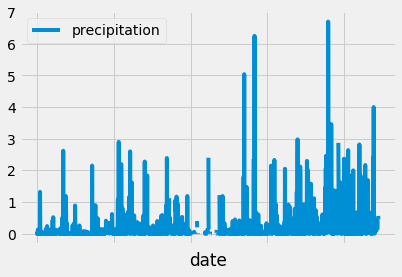

In [221]:
# Perform a query to retrieve the data and precipitation scores
# query = session.query(Measurement.date,Measurement.station, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(query, columns=['date', 'precipitation'])
df_sorted = df.sort_values('date')
df_sorted.set_index('date', inplace=True)
df_sorted.head()

# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates

# this plot looks like crap...
# df.plot.bar()
# plt.xlabel("Date")
# plt.xticks(rotation=90)
# plt.ylabel('precipitation')
# plt.grid(True)
# plt.show()

# different plot attempt. Looks like sample output
df.plot(x='date', y='precipitation')
plt.show()

In [207]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_stats = df_sorted['precipitation'].describe()
df = pd.DataFrame(percip_stats)
df


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [120]:
# How many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
stations

9

In [219]:
# What are the most active stations?
# List the stations and the counts in descending order.
top_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_id = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
top_active
# most_active_id

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [186]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_id[0]).all()

[(54.0, 85.0, 71.66378066378067)]

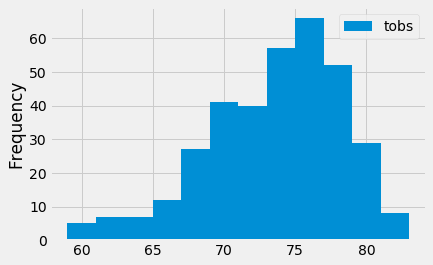

In [216]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# query tobs, filter by specific station, filter data to last year
restuls = session.query(Measurement.tobs).\
    filter(Measurement.date > previous_year_date).\
    filter(Measurement.station == most_active_id[0]).all()

# set labels for dataframe. only column we care about for this histogram is tobs
labels = ['tobs']

# use from_records in pandas to create dataframe
df = pd.DataFrame.from_records(restuls, columns=labels)

#and plot the results as a histogram with bins=12
df.plot.hist(bins=12)
plt.show()

## HW assignment says the following two analyses (temperature and rainfall) are optional...
## I'm moving on to the climate app for time's sake

In [217]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


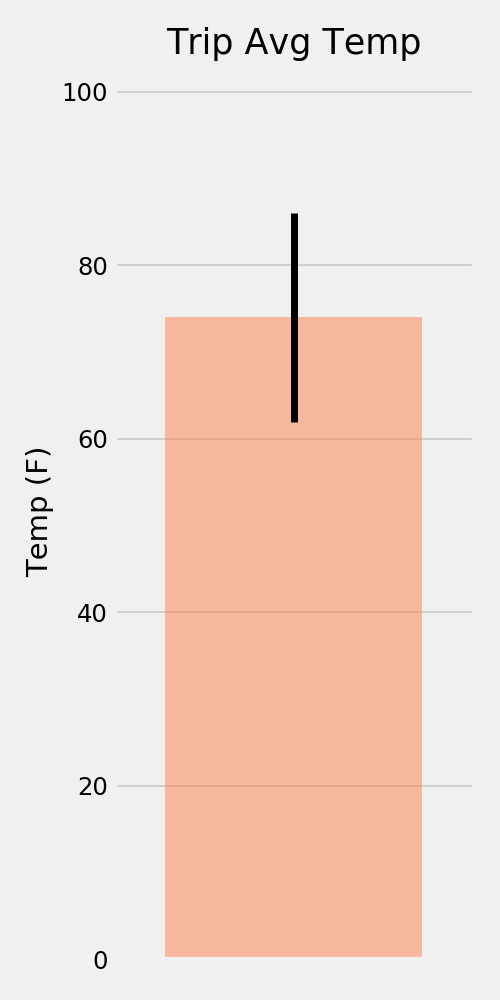

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


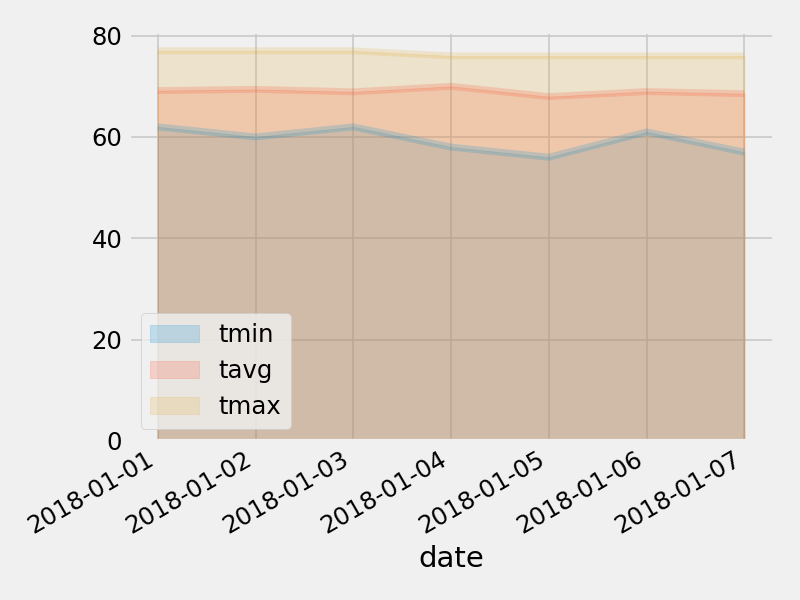

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
